In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
from IPython.display import HTML
import IPython.core.display as di
import os, sys
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
homedir=os.getcwd()
from plotly import express as px 


In [2]:
# Reading in the naming convention and colour code file
colorcode=pd.read_csv("tech_codes.csv",sep=',',encoding = "ISO-8859-1")
homedir=os.getcwd()

In [3]:
#please change this to your directory of the results. 
#You HAVE TO name the result folders as they are named below. like "REF", "WAT"

res_folder=['C:/git/teaching-CLEWs_visualization/results/REF',
            'C:/git/teaching-CLEWs_visualization/results/CLM',
            'C:/git/teaching-CLEWs_visualization/results/COMBO',
            'C:/git/teaching-CLEWs_visualization/results/ENR',
            'C:/git/teaching-CLEWs_visualization/results/LND',
            'C:/git/teaching-CLEWs_visualization/results/WAT']

In [4]:
# Making dictionaries linking the technology names to actual names and colour codes
colorcode1=colorcode.drop('colour',axis=1)
colorcode2=colorcode.drop('tech_code',axis=1)
det_col=dict([(a,b) for a,b in zip(colorcode1.tech_code,colorcode1.tech_name)])
color_dict=dict([(a,b) for a,b in zip(colorcode2.tech_name,colorcode2.colour)])

In [5]:
#Central plotting function
def df_plot(df,y_title,p_title):
    if len(df.columns)==1:
        print('There are no values for the result variable that you want to plot')
    else:
        #fig1 = plt.figure()
        df=df.set_index('YEAR')         
        fig1 = df.plot(kind="bar", stacked=True,grid=False, figsize=(15,5), color=[color_dict[x] for x in df.columns if x != 'YEAR'])
        fig1.set_title(p_title,color='black',fontsize=15)
        fig1.set_ylabel(y_title,color='black',fontsize=15)
        fig1.set_xlabel('Year',color='black',fontsize=15)
        fig1.legend(bbox_to_anchor=(1.0, 0.75))
        fig1.plot()
        #Hash the following line if you want to see inline graphs
        #plt.close()   
        #fig1.figure.savefig('{}.jpeg'.format(p_title),bbox_inches='tight')
        fig1.figure.savefig(homedir +'/{}.pdf'.format(p_title),bbox_inches='tight')
        #df.to_csv(os.path.join(homedir,p_title+".csv"))
        #return iplot(fig)

In [6]:
# Creating list with LAnd technology names needed for Land Graphs
land_tech=['AGRPST001','LNDBLT001', 'LNDCRP001I', 'LNDCRP001R', 'LNDCRP002I',
       'LNDCRP002R', 'LNDFOR001', 'LNDOTH001']
crop_tech=['LNDCRP001I', 'LNDCRP001R', 'LNDCRP002I',
       'LNDCRP002R']
pwr_tech=['PWRBIO001', 'PWRDSL001', 'PWRGAS001', 'PWRHYD001', 'PWRSOL001', 'PWRWND001']
wat_tech=['WATTRN001','WATELC001','WATAGR001']

In [7]:
#Remove the old pf and png files formt the results folder
for f in res_folder:
    homedir=f
    
    for l in os.listdir(homedir):
        if not l.endswith(".png") | l.endswith(".pdf") :
            continue
        os.remove(os.path.join(homedir, l))
        

c:\users\vsri\anaconda3\envs\myenv\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


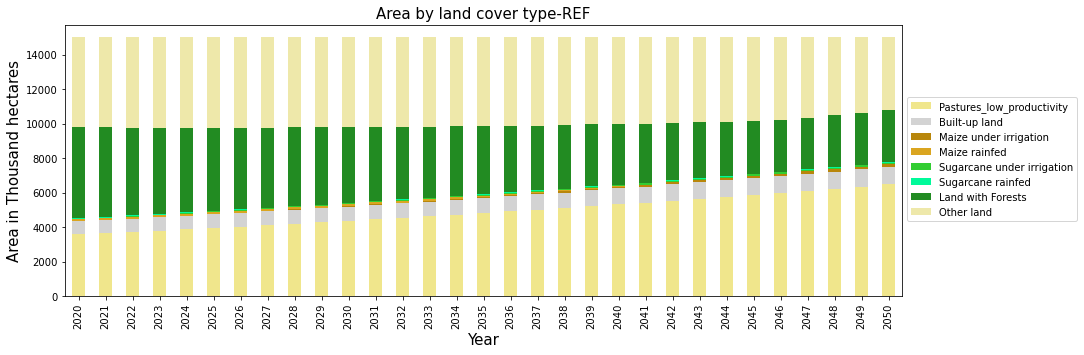

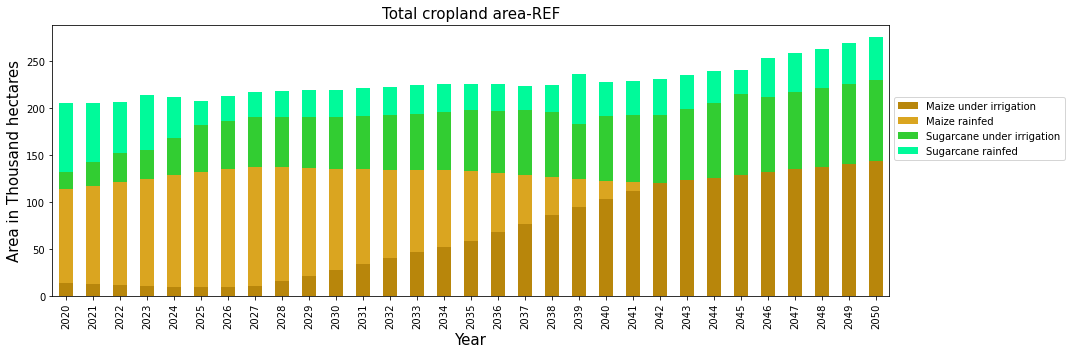

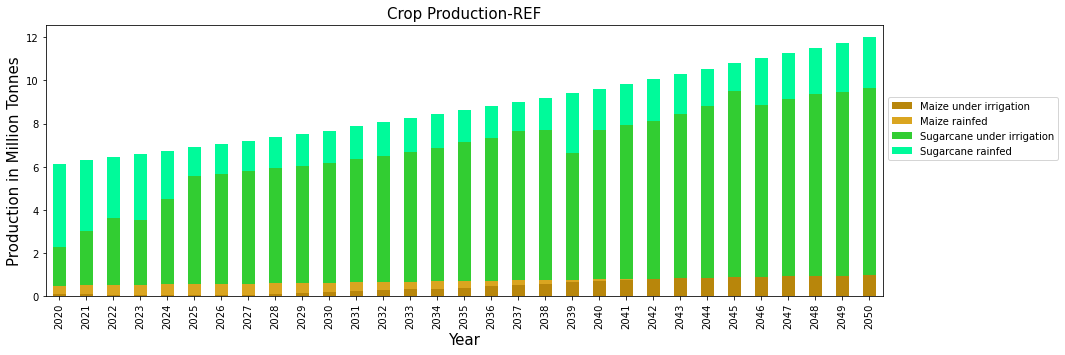

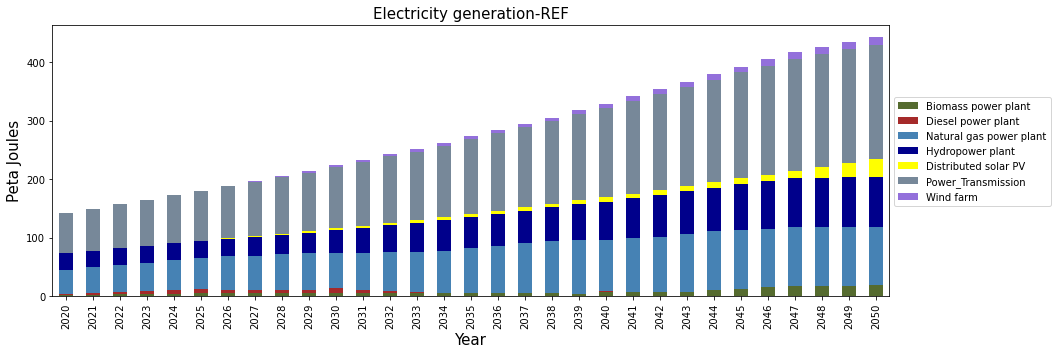

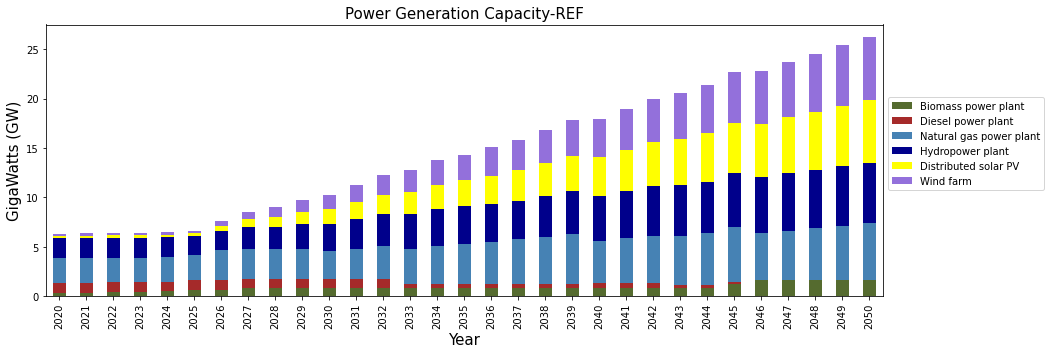

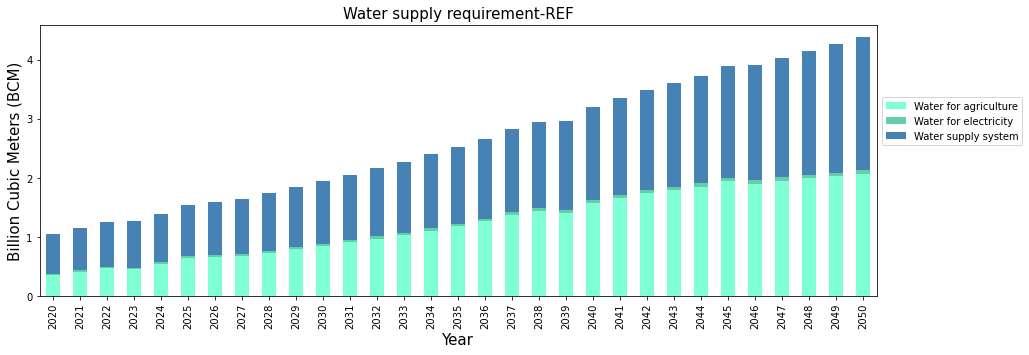

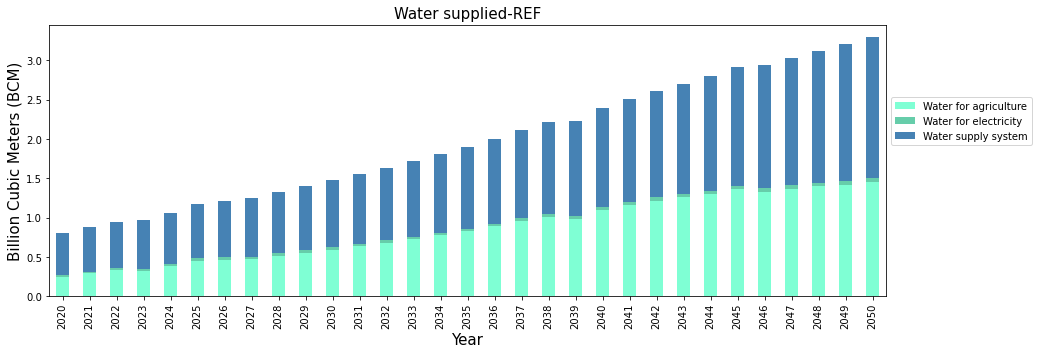

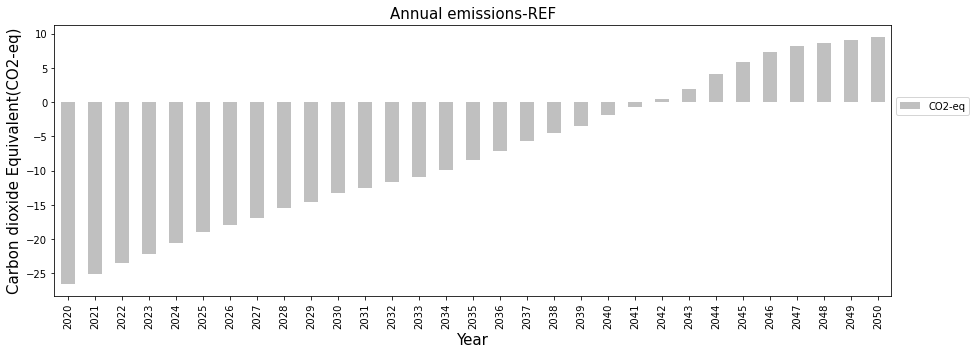

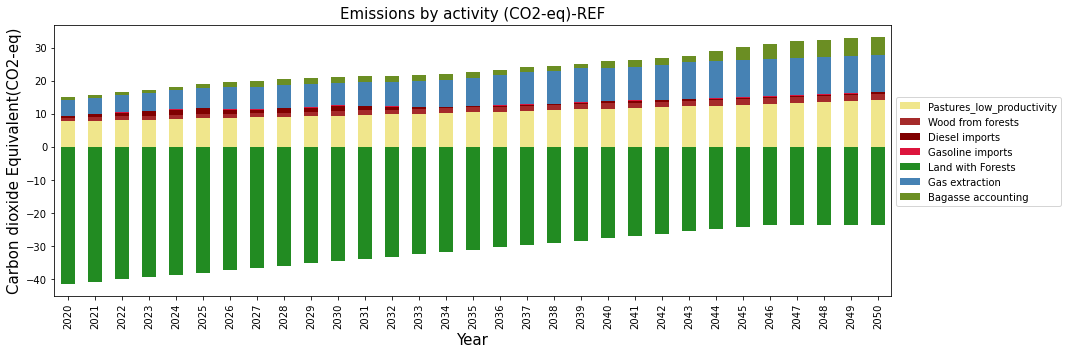

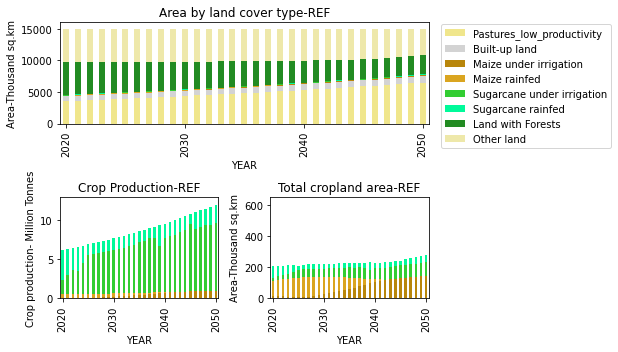

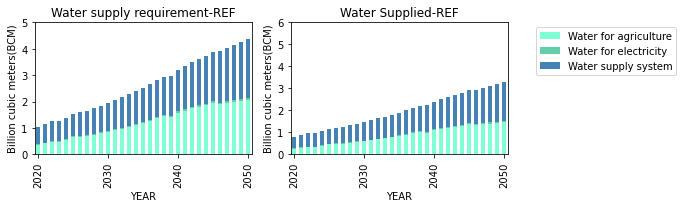

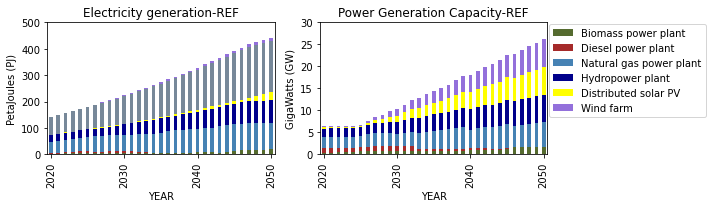

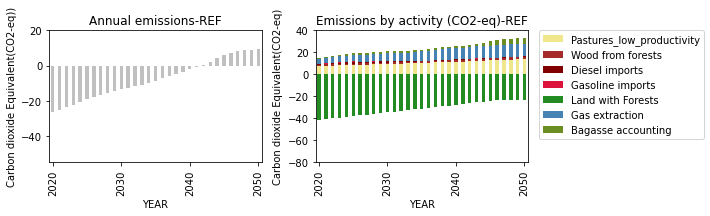

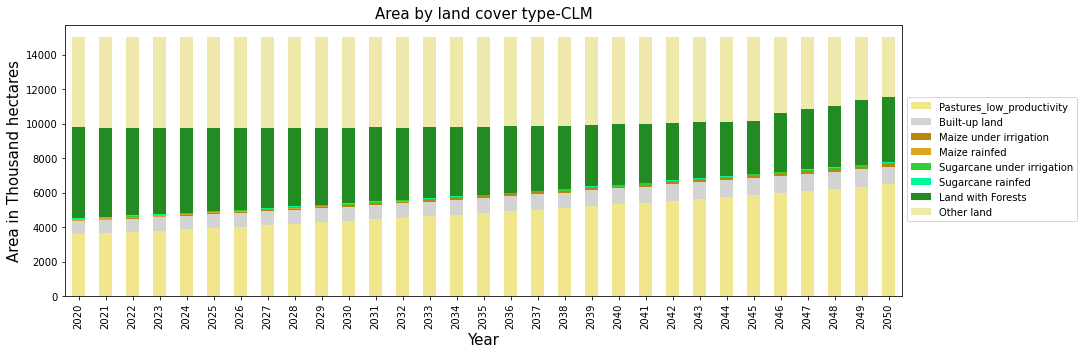

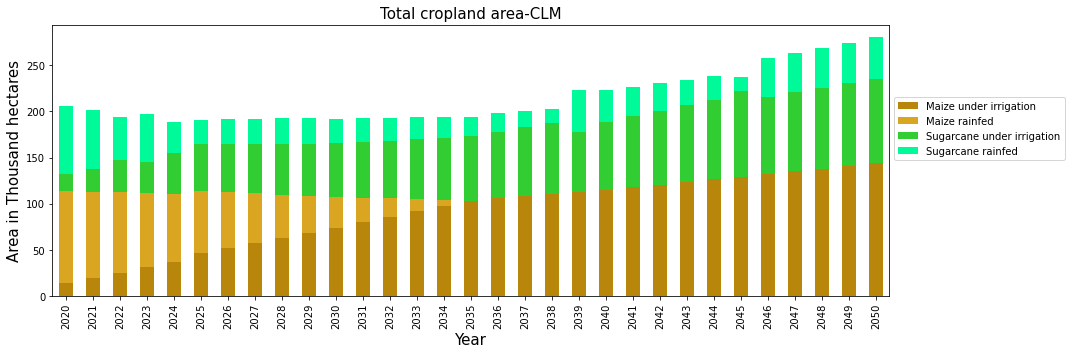

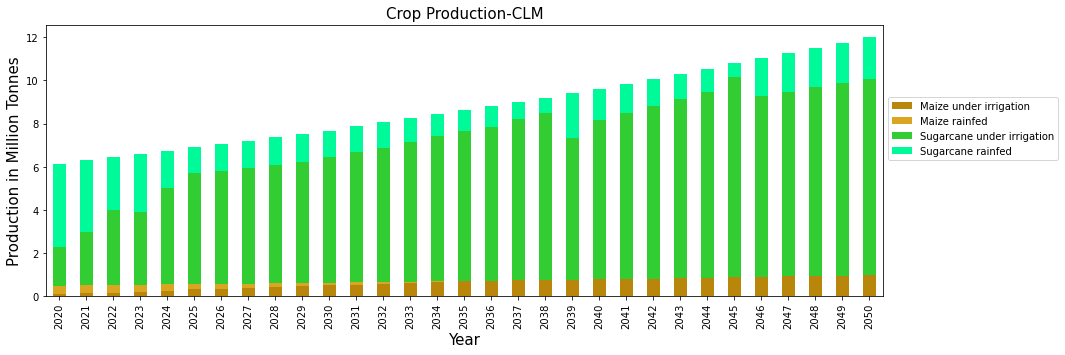

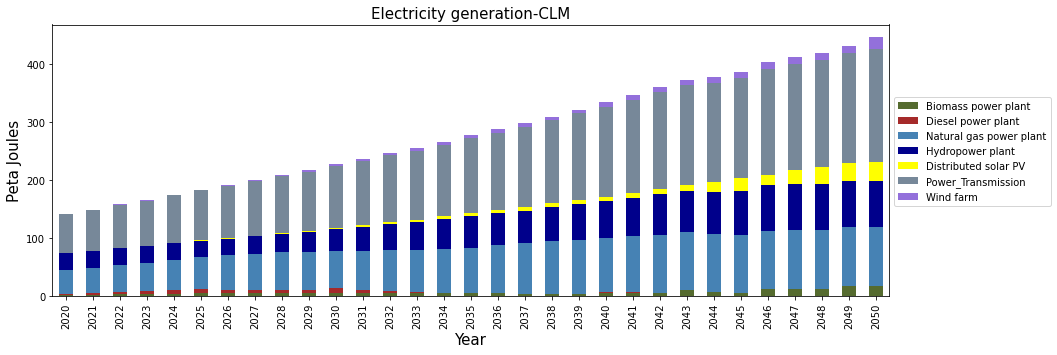

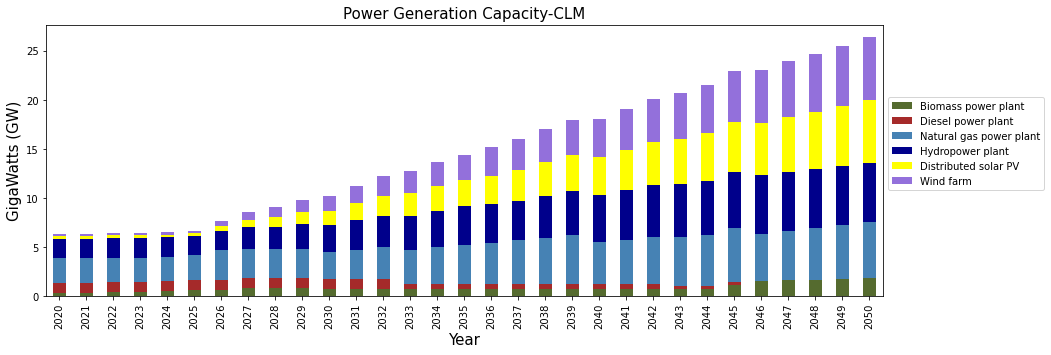

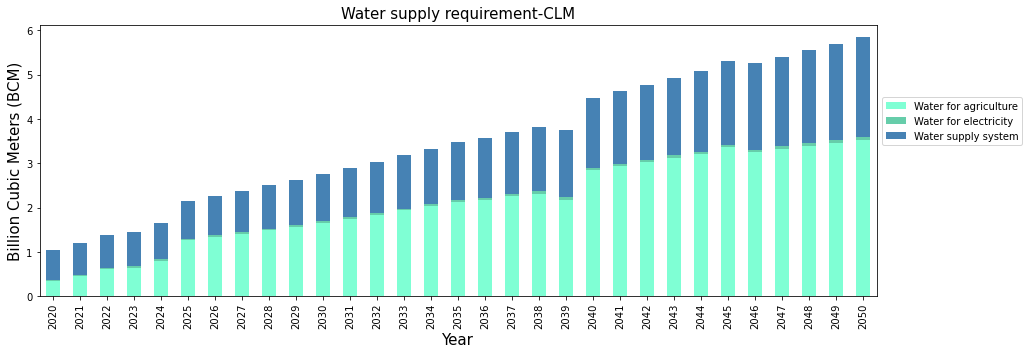

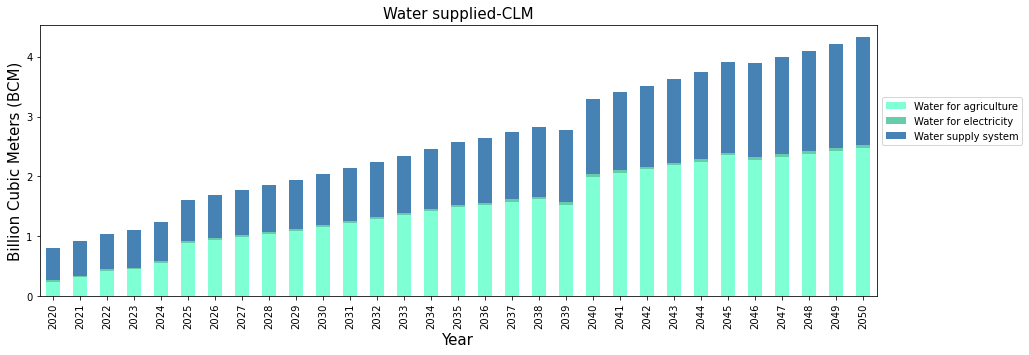

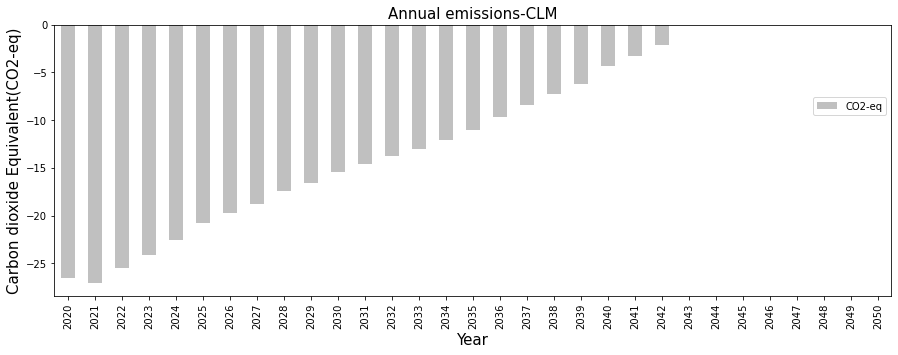

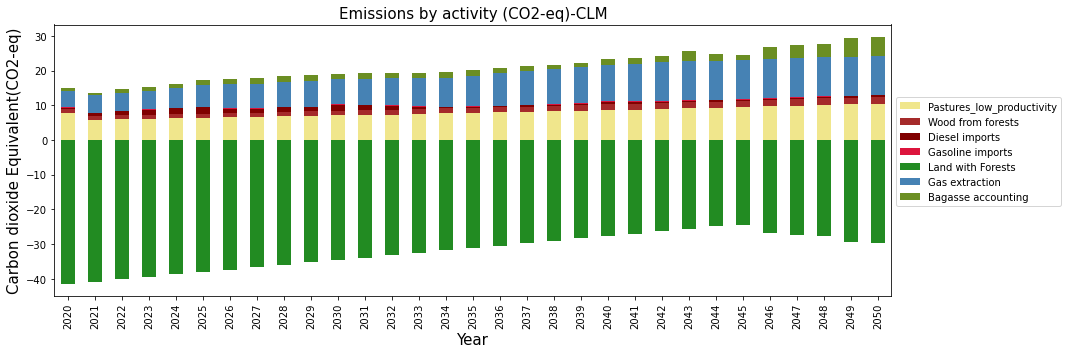

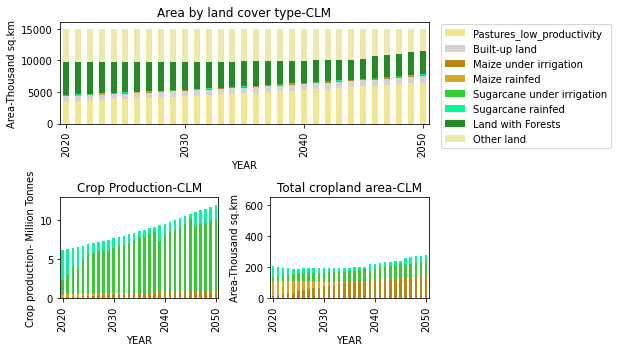

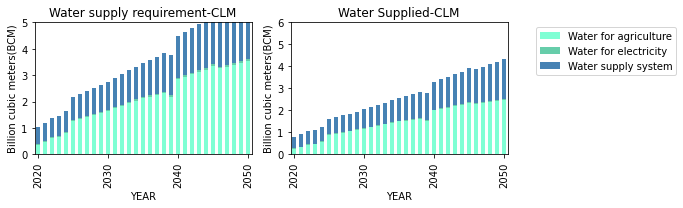

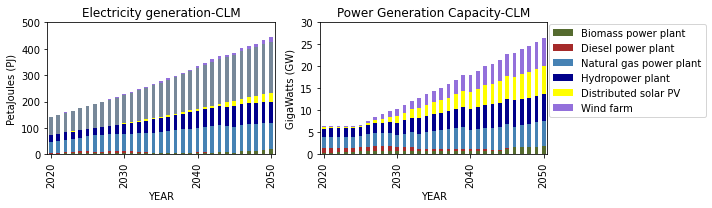

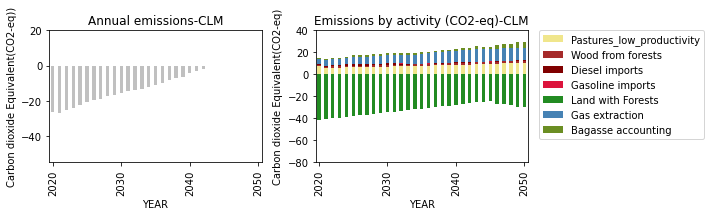

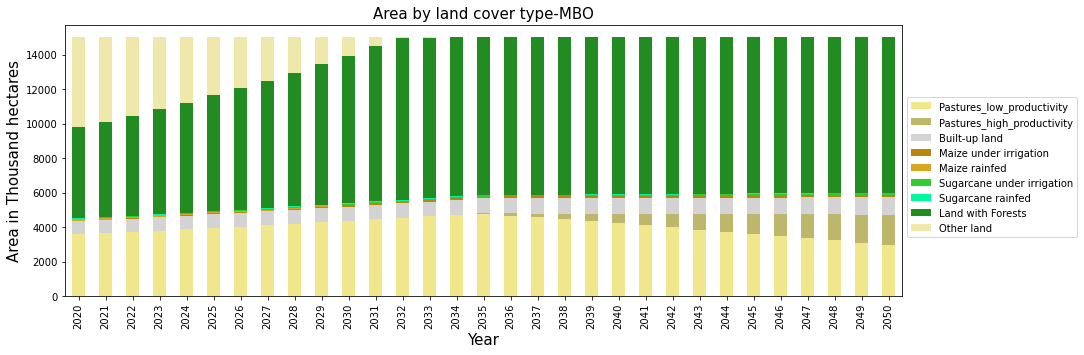

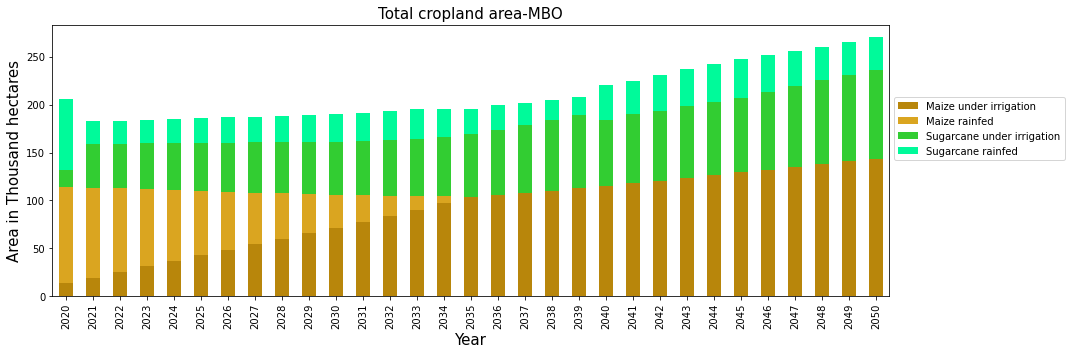

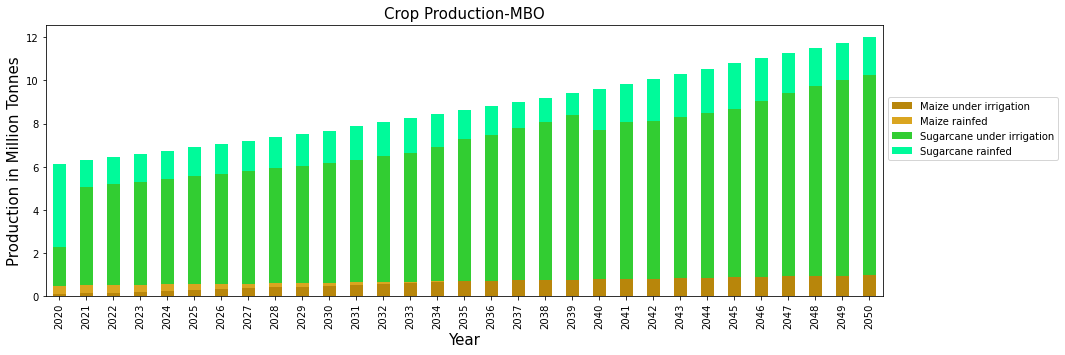

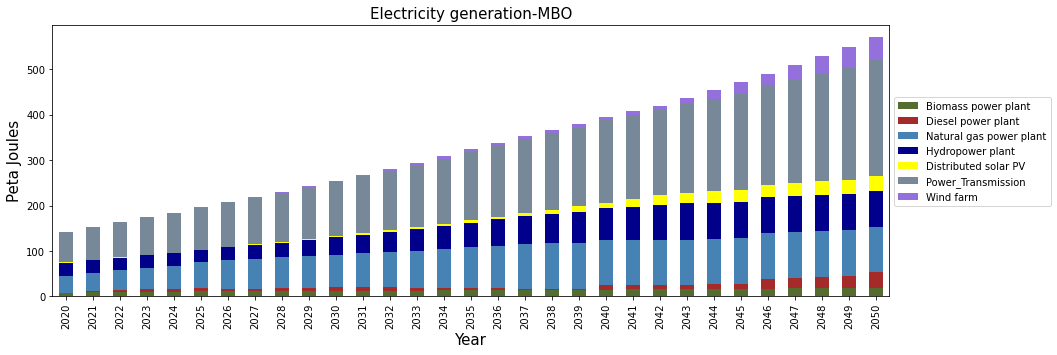

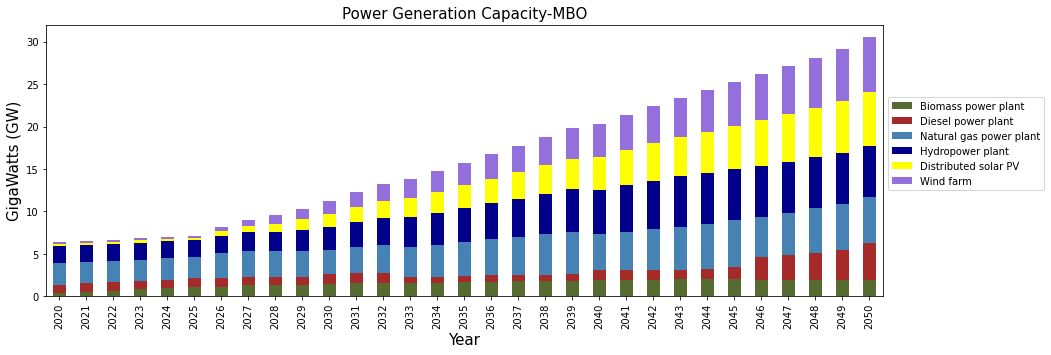

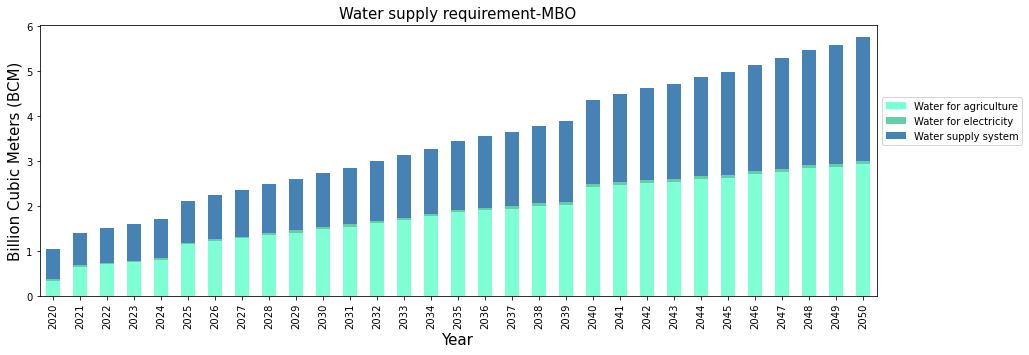

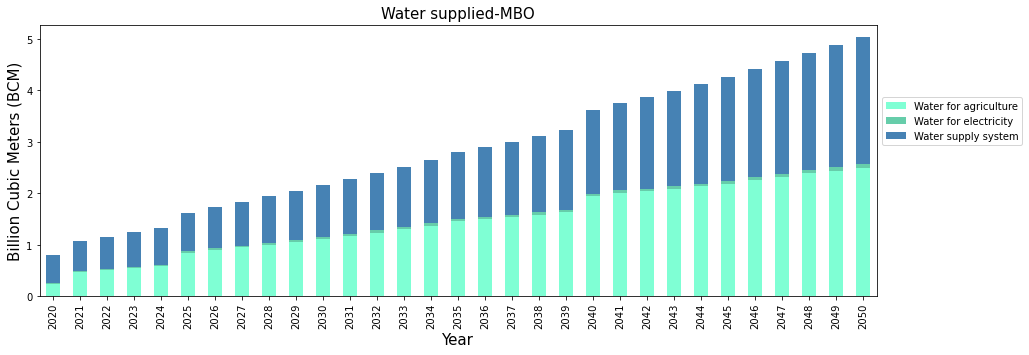

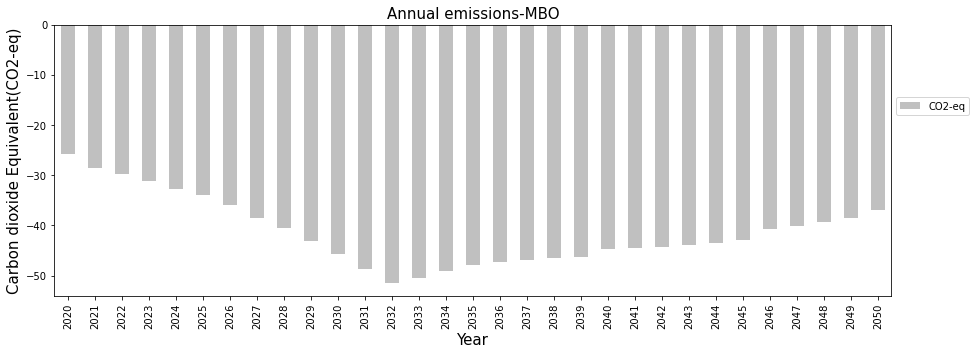

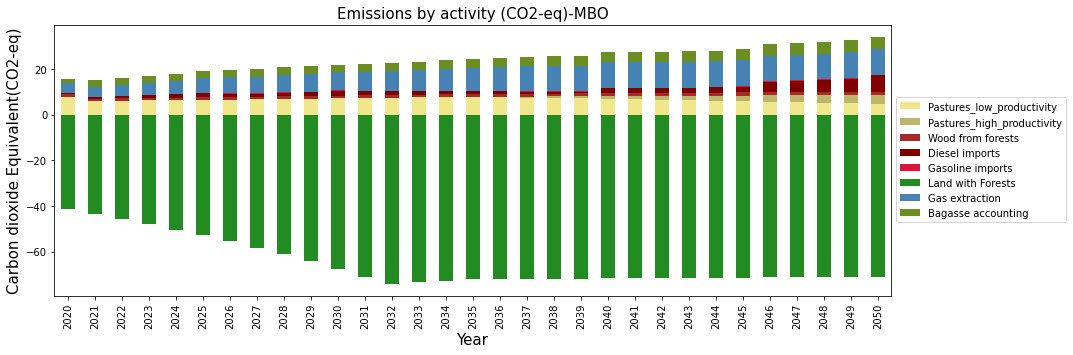

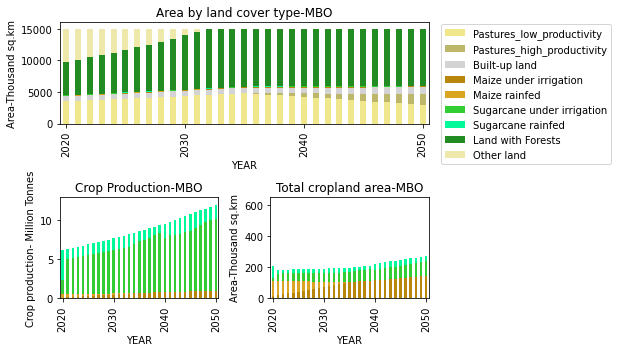

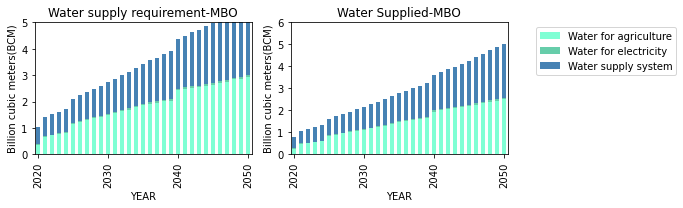

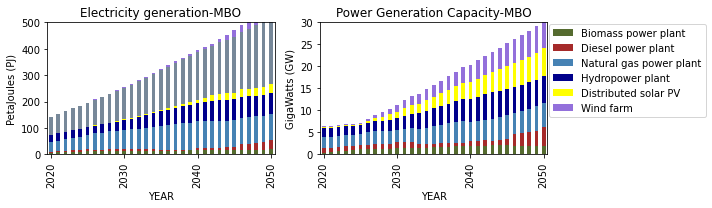

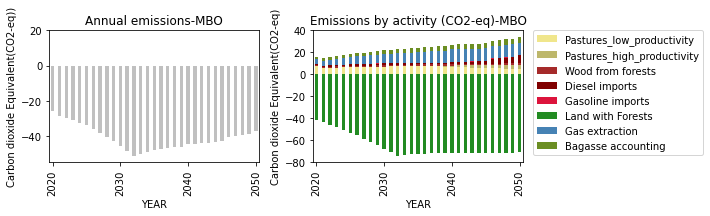

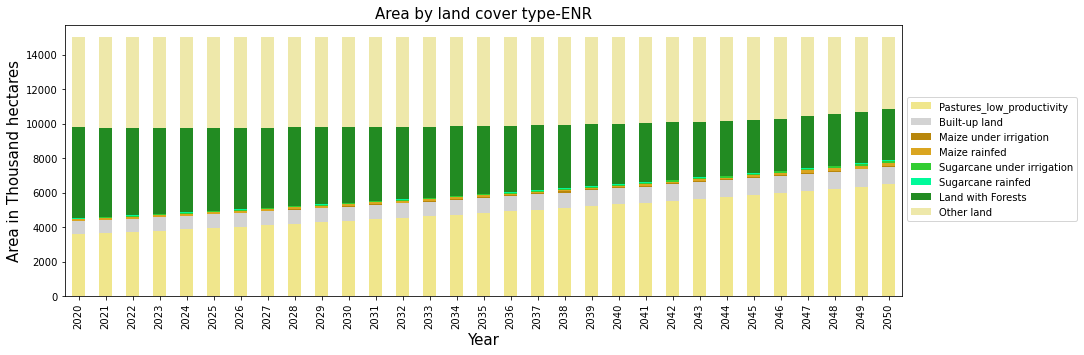

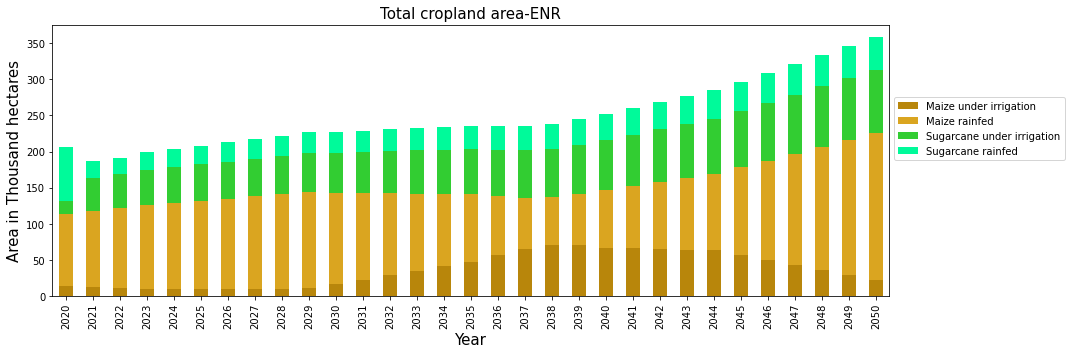

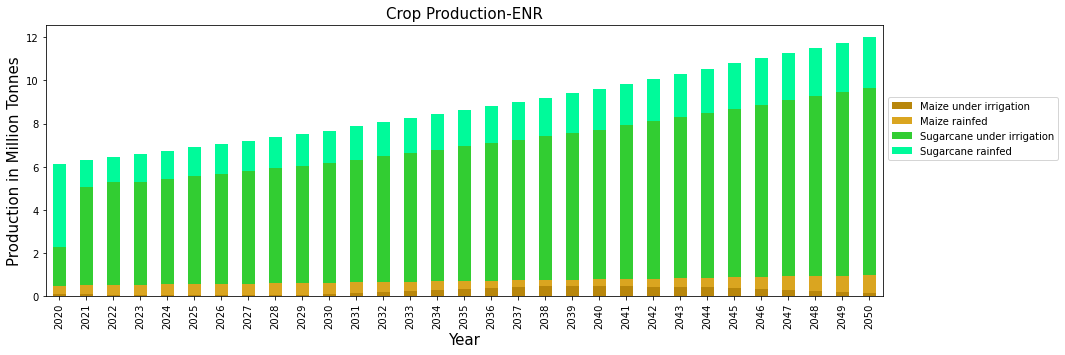

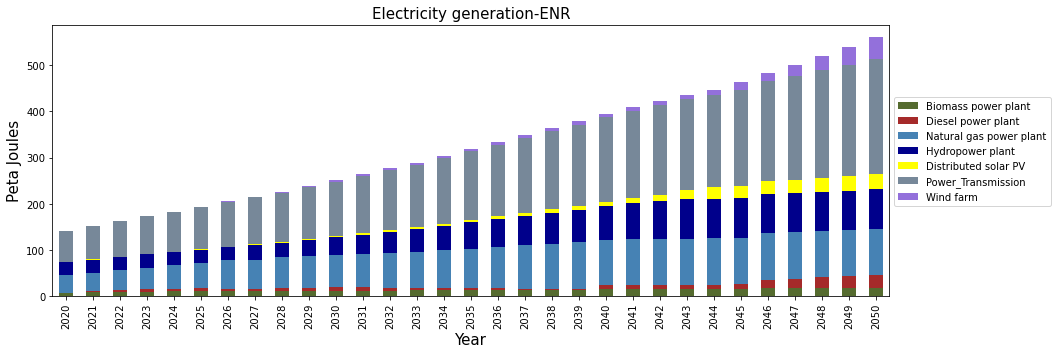

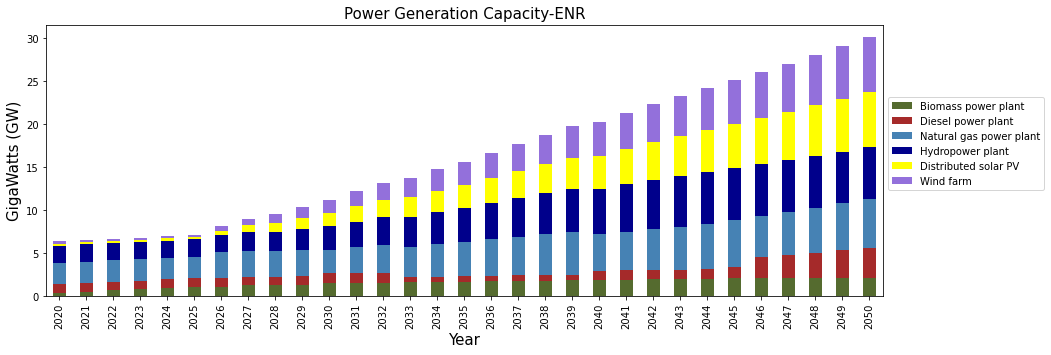

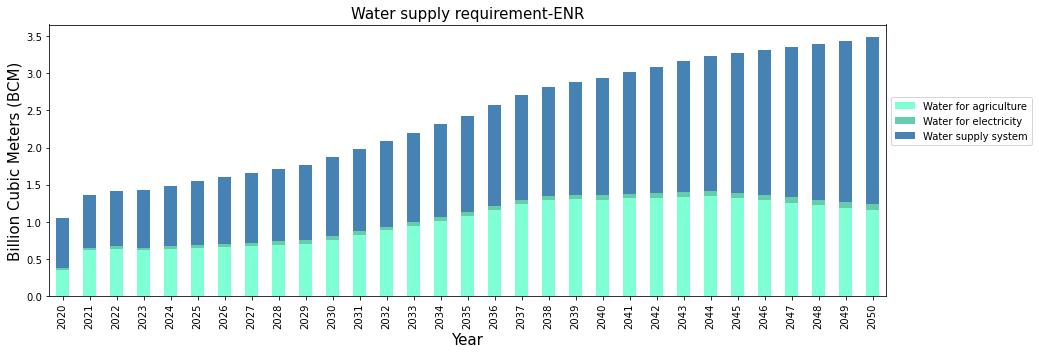

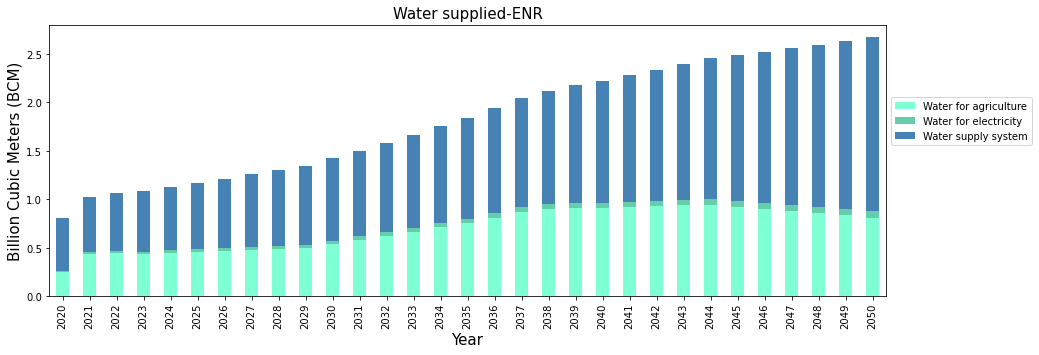

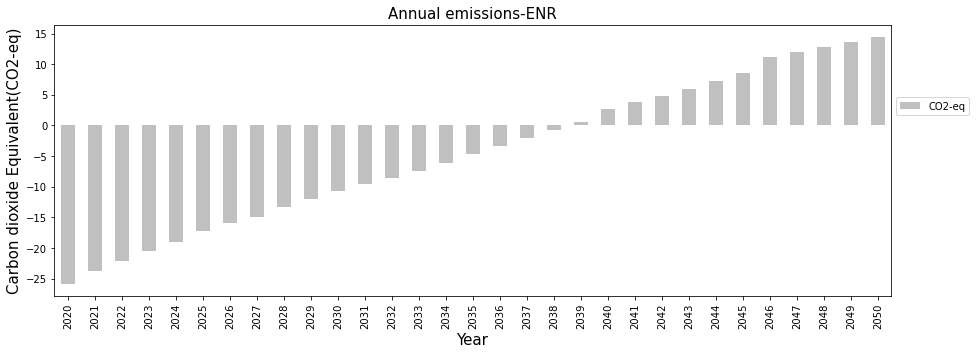

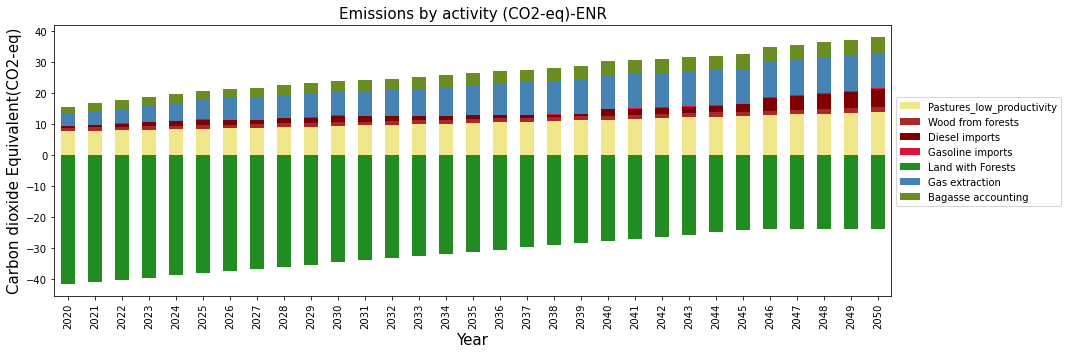

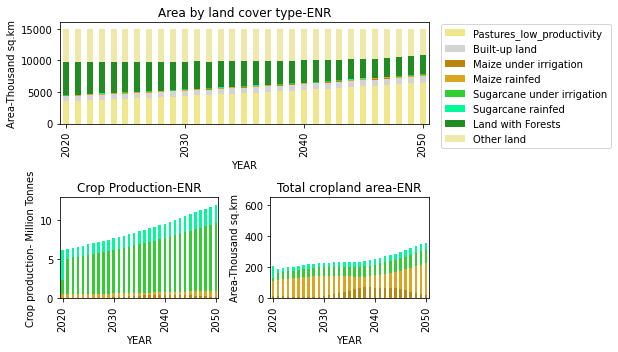

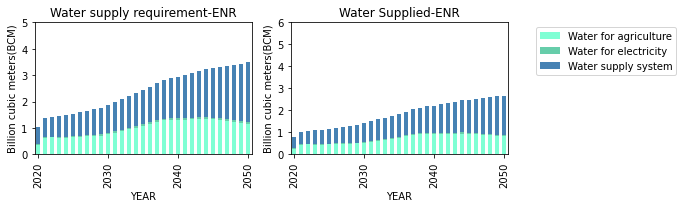

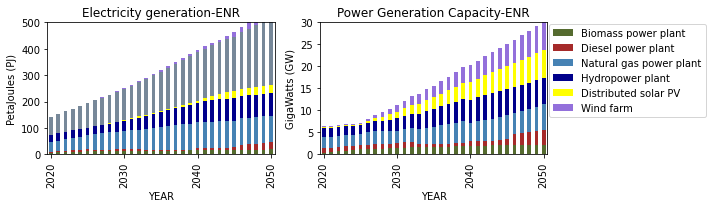

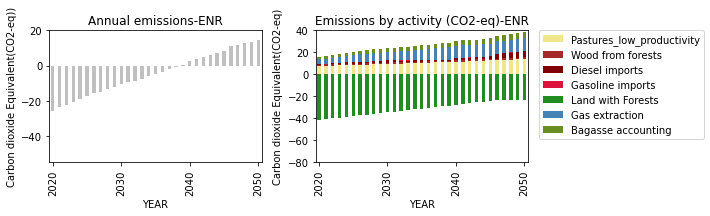

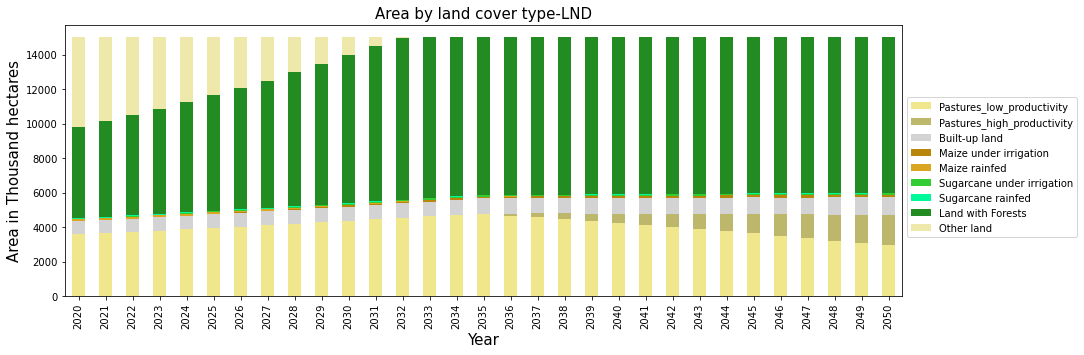

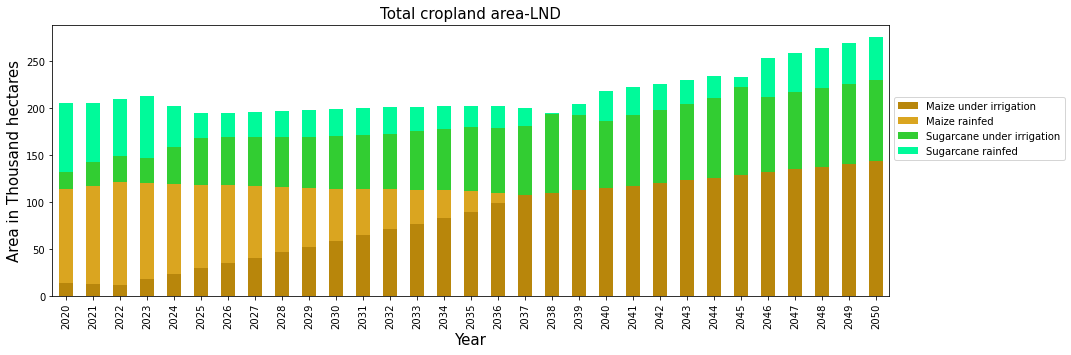

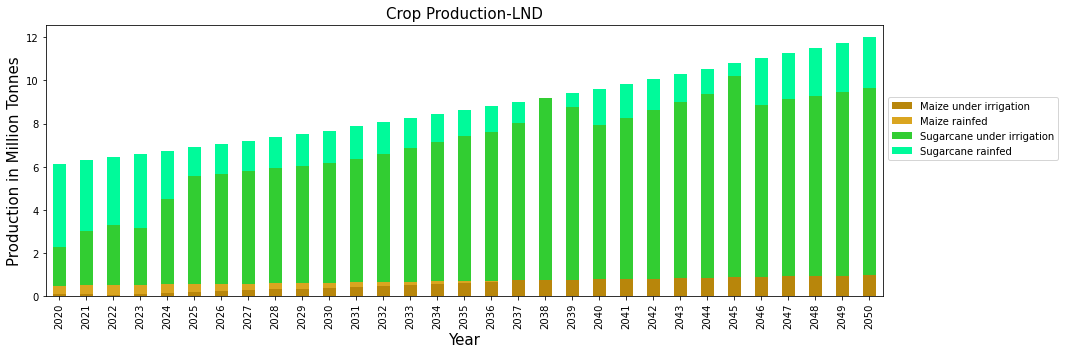

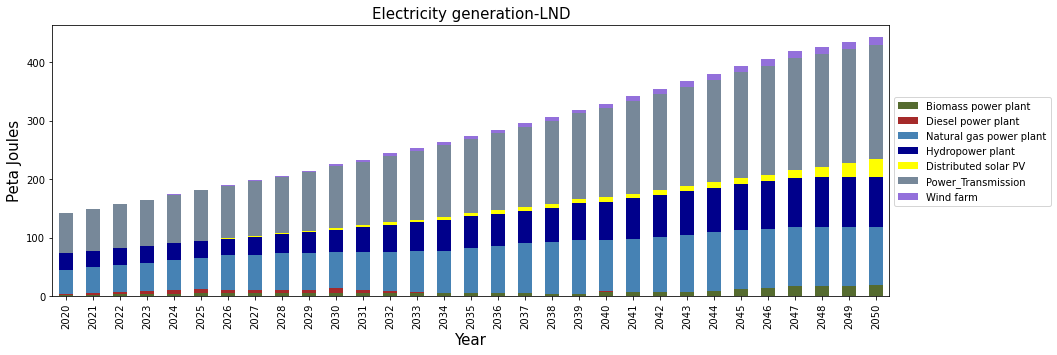

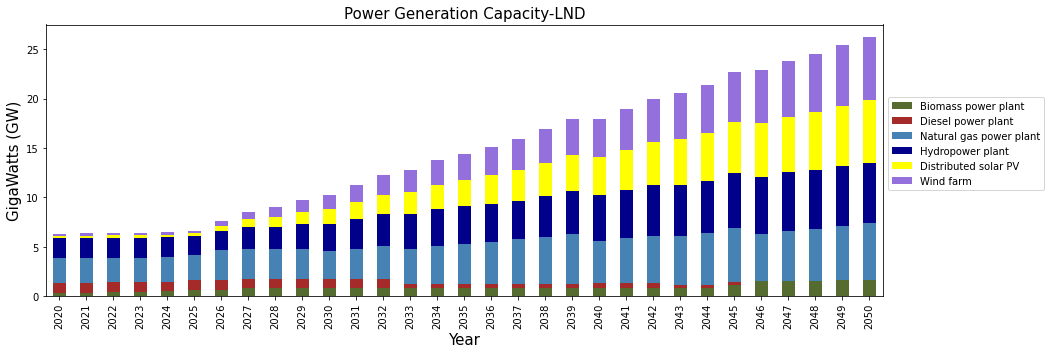

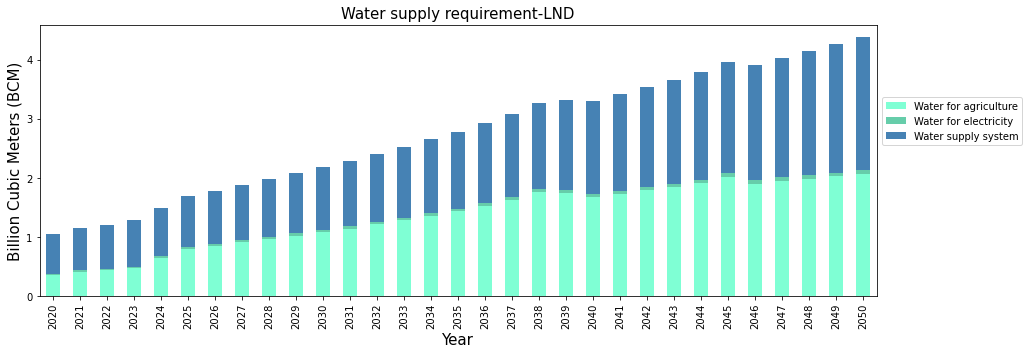

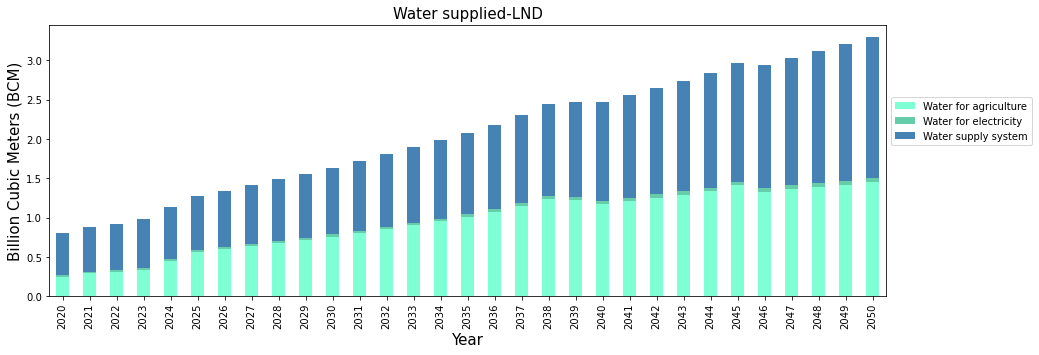

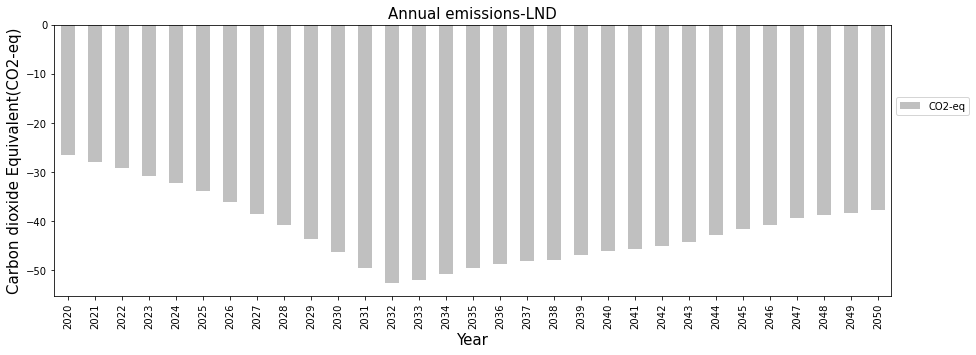

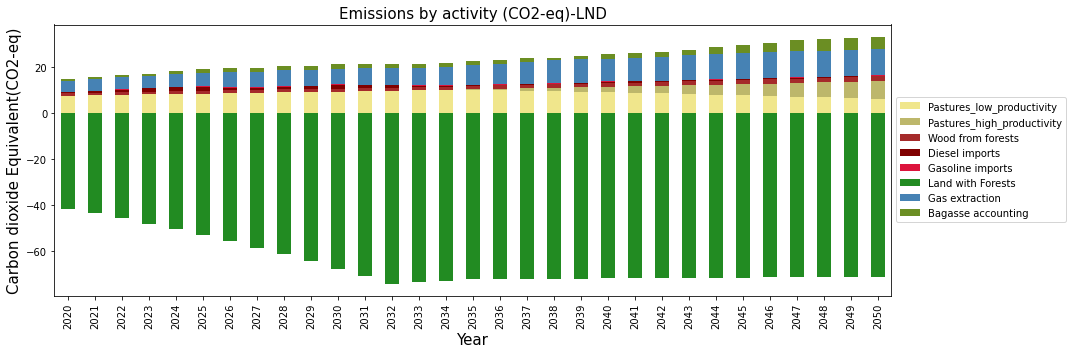

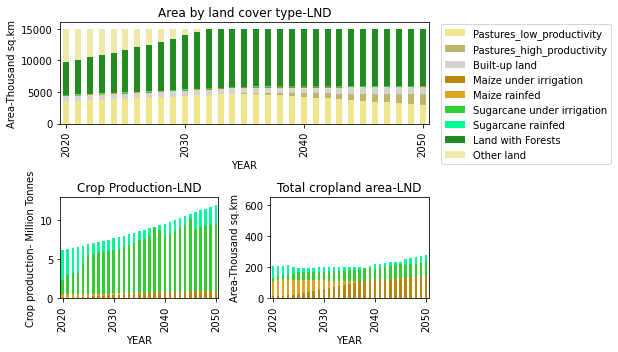

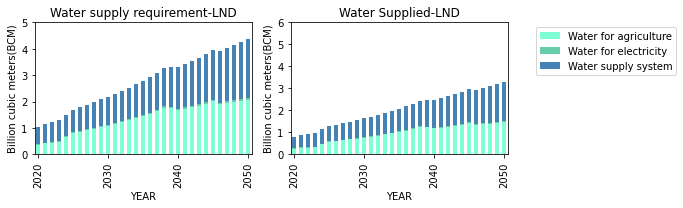

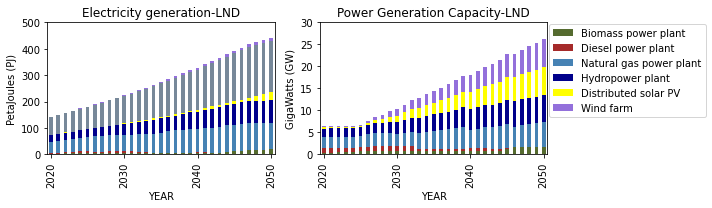

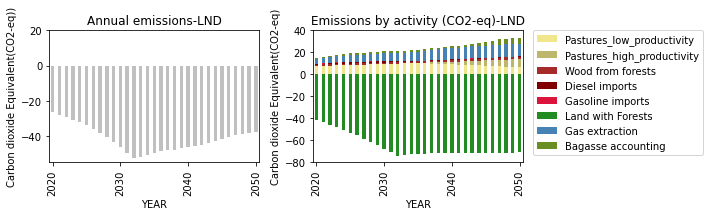

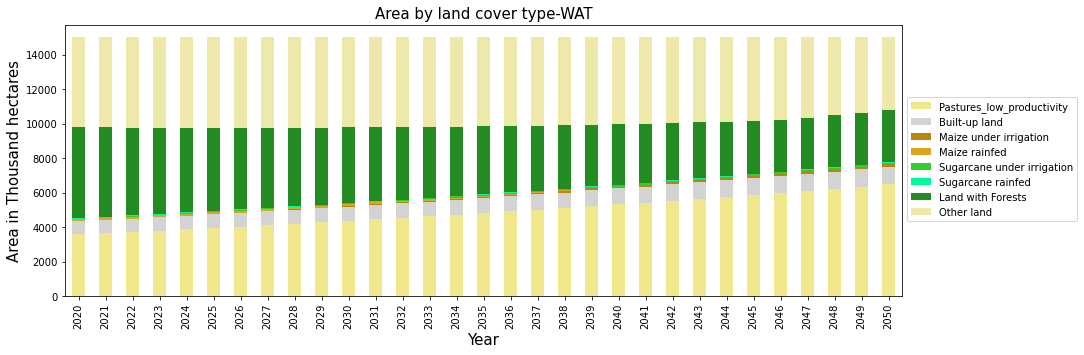

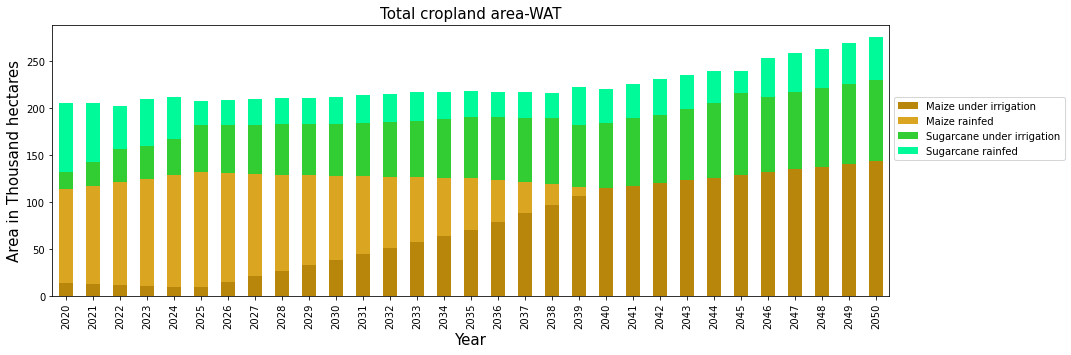

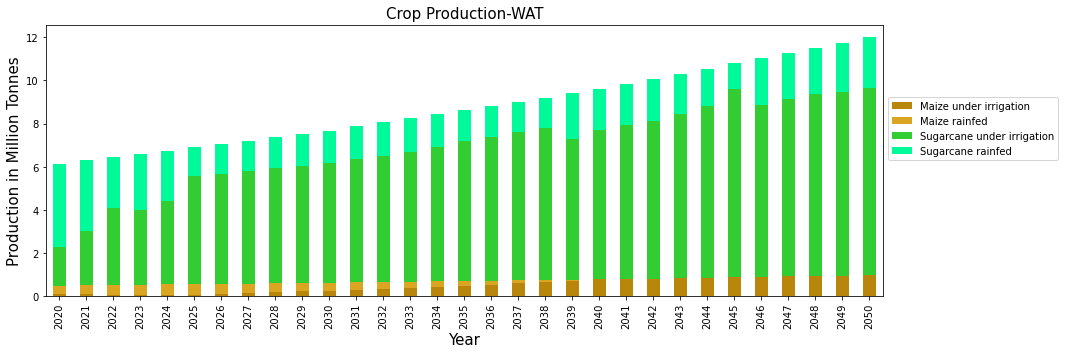

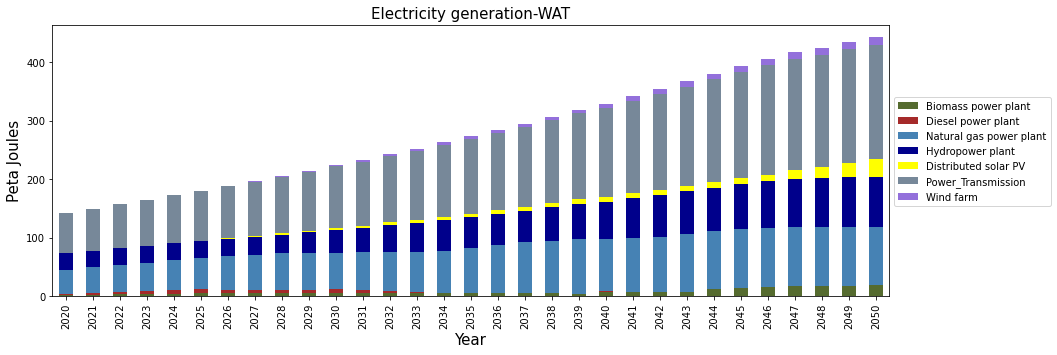

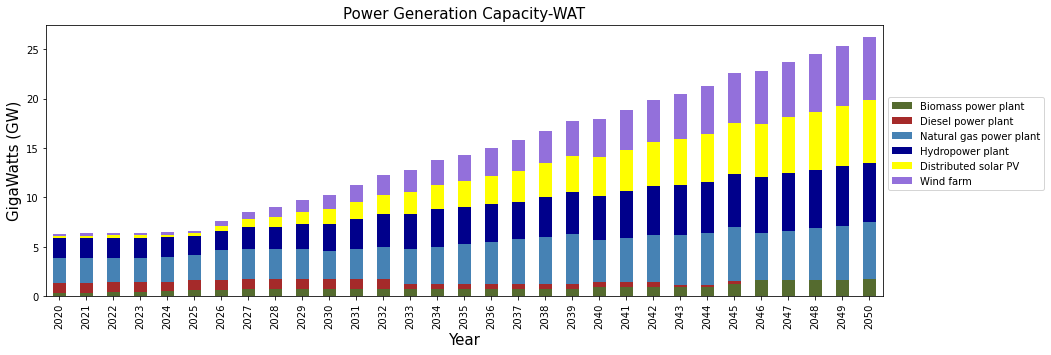

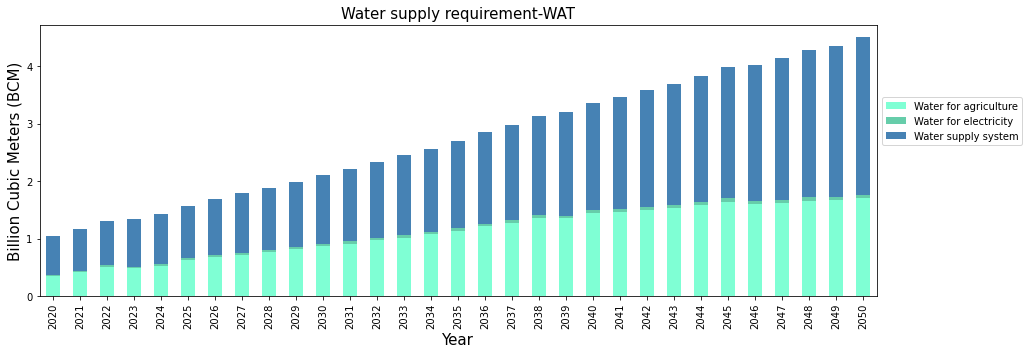

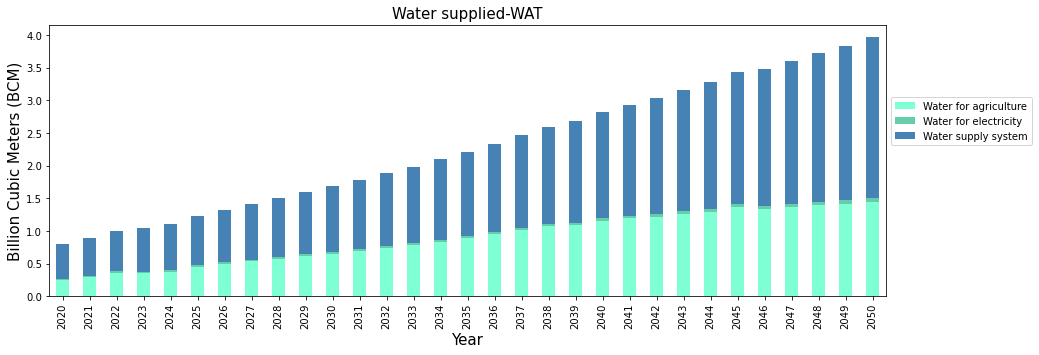

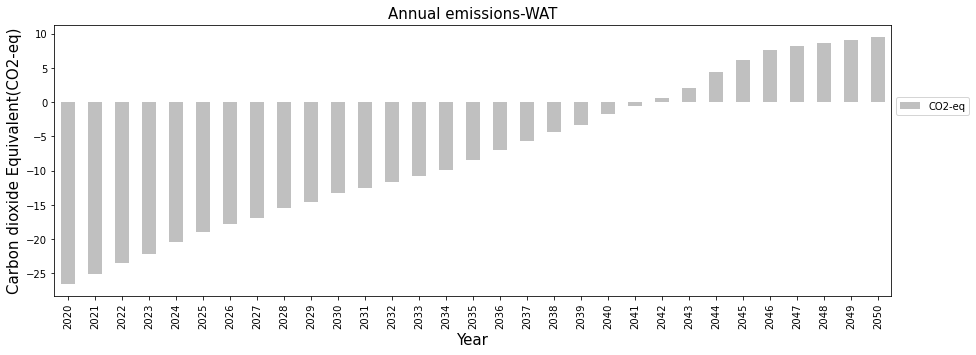

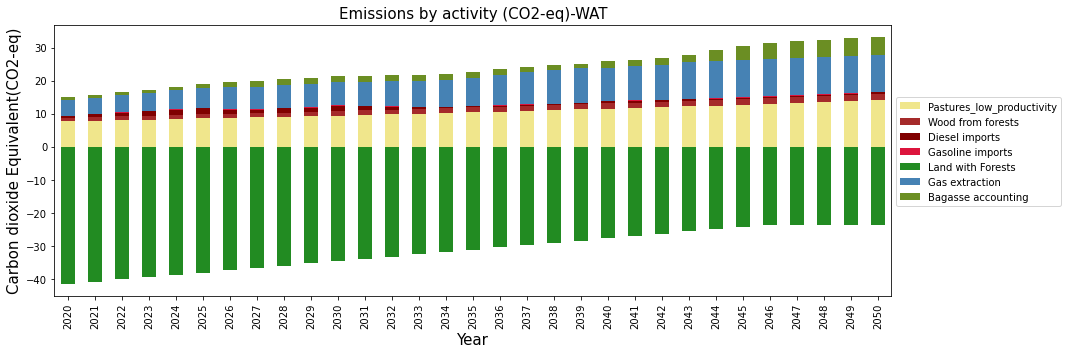

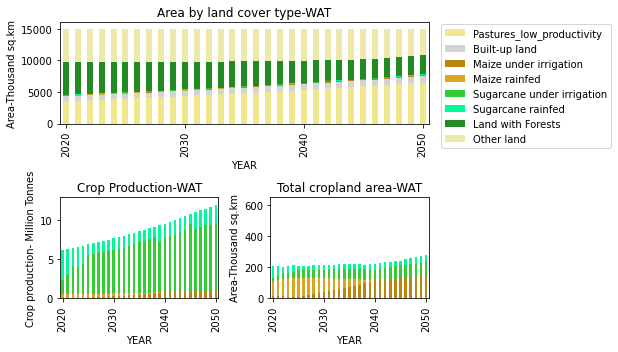

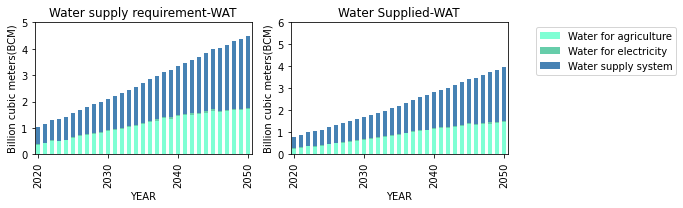

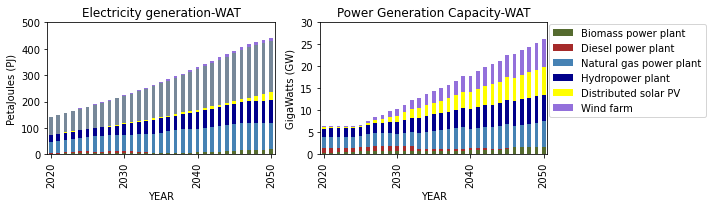

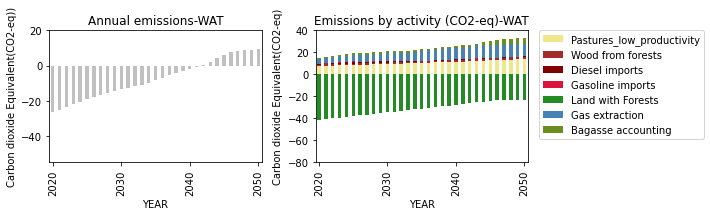

In [10]:
# for loop to loop between the different resuls folders. The folders must be named just with the scenario name
for f in res_folder:
    #changing the home directory
    homedir=f
    scen=homedir[-3:]
    #print(homedir)
    tot_ann_cap=pd.read_csv(homedir+'/TotalCapacityAnnual.csv')
    tot_ann_cap.drop('REGION',axis=1,inplace=True)
    tot_ann_cap=tot_ann_cap.set_index('YEAR')
    prod_tech_ann=pd.read_csv(homedir+'/ProductionByTechnologyAnnual.csv')
    prod_tech_ann.drop('REGION',axis=1,inplace=True)
    prod_tech_ann=prod_tech_ann.set_index('YEAR')
    useby_tech_ann=pd.read_csv(homedir+'/UseByTechnology.csv')
    useby_tech_ann.drop('REGION',axis=1,inplace=True)
    useby_tech_ann=useby_tech_ann.set_index('YEAR')
    emissions=pd.read_csv(homedir+'/AnnualEmissions.csv')
    emissions.drop('REGION',axis=1,inplace=True)
    emissions=emissions.set_index('YEAR')
    emis_by_tech=pd.read_csv(homedir+'/AnnualTechnologyEmission.csv')
    emis_by_tech.drop('REGION',axis=1,inplace=True)
    emis_by_tech=emis_by_tech.set_index('YEAR')
    ##
    # Land Dataframes
    tot_land_cap= prod_tech_ann[prod_tech_ann['COMMODITY']=='LND001'].pivot_table(index='YEAR', 
                                               columns='TECHNOLOGY',
                                               values='VALUE', 
                                               aggfunc='sum').reset_index().rename_axis(None, axis=1).rename(columns=det_col).fillna(0)
    tot_land_cap=tot_land_cap[tot_land_cap['YEAR'].between(2020,2050)]


    tot_crop_cap= prod_tech_ann[(prod_tech_ann['COMMODITY']=='LND001') & (prod_tech_ann['TECHNOLOGY'].isin(crop_tech))].pivot_table(index='YEAR', 
                                                   columns='TECHNOLOGY',
                                                   values='VALUE', 
                                                   aggfunc='sum').reset_index().rename_axis(None, axis=1).rename(columns=det_col).fillna(0)
    tot_crop_cap=tot_crop_cap[tot_crop_cap['YEAR'].between(2020,2050)]

    tot_crop_prod=prod_tech_ann[(prod_tech_ann['COMMODITY']=='CRP001') | (prod_tech_ann['COMMODITY']=='CRP002')].pivot_table(index='YEAR', 
                                                   columns='TECHNOLOGY',
                                                   values='VALUE', 
                                                   aggfunc='sum').reset_index().rename_axis(None, axis=1).rename(columns=det_col).fillna(0)
    tot_crop_prod=tot_crop_prod[tot_crop_prod['YEAR'].between(2020,2050)]

    #Electricity dataframes
    elec_gen= prod_tech_ann[(prod_tech_ann['TECHNOLOGY'].str.startswith('PWR')) & (prod_tech_ann['TECHNOLOGY'] !='PWRTRN') & (prod_tech_ann['COMMODITY'].str[:3] =='ELC')].pivot_table(index='YEAR', 
                                                   columns='TECHNOLOGY',
                                                   values='VALUE', 
                                                   aggfunc='sum').reset_index().rename_axis(None, axis=1).rename(columns=det_col).fillna(0)
    elec_gen=elec_gen[elec_gen['YEAR'].between(2020,2050)]
    pwr_cap= tot_ann_cap[tot_ann_cap['TECHNOLOGY'].isin(pwr_tech)].pivot_table(index='YEAR', 
                                                   columns='TECHNOLOGY',
                                                   values='VALUE', 
                                                   aggfunc='sum').reset_index().rename_axis(None, axis=1).rename(columns=det_col).fillna(0)
    pwr_cap=pwr_cap[pwr_cap['YEAR'].between(2020,2050)]
    # Energy supply by type (to be corrected)
    #energy_supply= prod_tech_ann[(prod_tech_ann['TECHNOLOGY'].str.startswith('PWR')) & (prod_tech_ann['TECHNOLOGY'] !='PWRTRN') & (prod_tech_ann['COMMODITY'].str[:3] =='ELC')].pivot_table(index='YEAR', 
                                                   #columns='TECHNOLOGY',
                                                   #values='VALUE', 
                                                   #aggfunc='sum').reset_index().rename_axis(None, axis=1).rename(columns=det_col).fillna(0)
    #energy_supply=energy_supply[energy_supply['YEAR'].between(2020,2050)]
    #Water dataframes
    wat_sup_req= useby_tech_ann[(useby_tech_ann['COMMODITY'].str.startswith('WAT001'))].pivot_table(index='YEAR', 
                                                   columns='TECHNOLOGY',
                                                   values='VALUE', 
                                                   aggfunc='sum').reset_index().rename_axis(None, axis=1).rename(columns=det_col).fillna(0)
    wat_sup_req=wat_sup_req[wat_sup_req['YEAR'].between(2020,2050)]
    wat_sup_cap= tot_ann_cap[tot_ann_cap['TECHNOLOGY'].isin(wat_tech)].pivot_table(index='YEAR', 
                                                   columns='TECHNOLOGY',
                                                   values='VALUE', 
                                                   aggfunc='sum').reset_index().rename_axis(None, axis=1).rename(columns=det_col).fillna(0)
    wat_sup_cap=wat_sup_cap[wat_sup_cap['YEAR'].between(2020,2050)]
    wat_sup_prod= prod_tech_ann[prod_tech_ann['TECHNOLOGY'].isin(wat_tech)].pivot_table(index='YEAR', 
                                                   columns='TECHNOLOGY',
                                                   values='VALUE', 
                                                   aggfunc='sum').reset_index().rename_axis(None, axis=1).rename(columns=det_col).fillna(0)
    wat_sup_prod=wat_sup_prod[wat_sup_prod['YEAR'].between(2020,2050)]
    #Emission/climate dataframes
    tot_emissions=emissions[emissions['EMISSION'] =='CO2EQ'].pivot_table(index='YEAR', 
                                                   columns='EMISSION',
                                                   values='VALUE', 
                                                   aggfunc='sum').reset_index().rename_axis(None, axis=1).rename(columns=det_col).fillna(0)
    tot_emissions=tot_emissions[tot_emissions['YEAR'].between(2020,2050)]
    tot_co2eq_emissions=emis_by_tech[emis_by_tech['EMISSION'] =='CO2EQ'].pivot_table(index='YEAR', 
                                                   columns='TECHNOLOGY',
                                                   values='VALUE', 
                                                   aggfunc='sum').reset_index().rename_axis(None, axis=1).rename(columns=det_col).fillna(0)
    tot_co2eq_emissions=tot_co2eq_emissions[tot_co2eq_emissions['YEAR'].between(2020,2050)]
    #Land plots (individual)
    df_plot(tot_land_cap,'Area in Thousand hectares','Area by land cover type'+"-"+scen)
    df_plot(tot_crop_cap,'Area in Thousand hectares','Total cropland area'+"-"+scen)
    df_plot(tot_crop_prod,'Production in Million Tonnes','Crop Production'+"-"+scen)
    #Energy plots (individual)
    df_plot(elec_gen,'Peta Joules','Electricity generation'+"-"+scen)
    df_plot(pwr_cap,'GigaWatts (GW)','Power Generation Capacity'+"-"+scen)
    #Water plots (individual)
    df_plot(wat_sup_req,'Billion Cubic Meters (BCM)','Water supply requirement'+"-"+scen)
    #df_plot(wat_sup_cap,'Billion Cubic Meters (BCM)','Water supply capacity')# removed as it was not necessary
    df_plot(wat_sup_prod,'Billion Cubic Meters (BCM)','Water supplied'+"-"+scen)
    #Climate plots (individual)
    df_plot(tot_emissions,'Carbon dioxide Equivalent(CO2-eq)','Annual emissions'+"-"+scen)
    df_plot(tot_co2eq_emissions,'Carbon dioxide Equivalent(CO2-eq)','Emissions by activity (CO2-eq)'+"-"+scen)
    ####*****###
    # Land Subplots
    fig=plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(223)
    ax3 = fig.add_subplot(224)
    #fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,5))
    tot_land_cap.plot(x='YEAR',kind='bar',stacked=True, ax=ax1,legend=False,ylabel='Area-Thousand sq.km',color=[color_dict[x] for x in tot_land_cap.columns if x != 'YEAR']); ax1.set_title('Area by land cover type'+"-"+scen)
    tot_crop_cap.plot(x='YEAR',kind='bar',stacked=True, ax=ax3,legend=False,ylabel='Area-Thousand sq.km',color=[color_dict[x] for x in tot_crop_cap.columns if x != 'YEAR']); ax3.set_title('Total cropland area'+"-"+scen)
    tot_crop_prod.plot(x='YEAR',kind='bar',stacked=True, ax=ax2,legend=False,ylabel='Crop production- Million Tonnes',color=[color_dict[x] for x in tot_crop_cap.columns if x != 'YEAR']); ax2.set_title('Crop Production'+"-"+scen)
    ax1.set_xticks(range(0,40,10))
    ax1.set_ylim(0,16000)
    ax1.legend(bbox_to_anchor=(1.5,1),borderaxespad=0.2)
    ax2.set_xticks(range(0,40,10))
    ax2.set_ylim(0,13)
    ax3.set_xticks(range(0,40,10))
    ax3.set_ylim(0,650)
    #fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # used for group legend
    plt.tight_layout()
    #Hash the following line if you want to see inline graphs
    #plt.close()
    plt.savefig(homedir+"/land_subplots"+"-"+scen+".pdf")
    plt.savefig(homedir+"/land_subplots"+"-"+scen+".png")
    #************************#
    # Water Subplots
    fig=plt.figure(figsize=(10,3))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    #ax3 = fig.add_subplot(224)
    #fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,5))
    wat_sup_req.plot(x='YEAR',kind='bar',stacked=True, ax=ax1,legend=False,ylabel='Billion cubic meters(BCM)',color=[color_dict[x] for x in wat_sup_req.columns if x != 'YEAR']); ax1.set_title('Water supply requirement'+"-"+scen)
    wat_sup_prod.plot(x='YEAR',kind='bar',stacked=True, ax=ax2,legend=False,ylabel='Billion cubic meters(BCM)',color=[color_dict[x] for x in wat_sup_prod.columns if x != 'YEAR']); ax2.set_title('Water Supplied'+"-"+scen)
    #wat_sup_cap.plot(x='YEAR',kind='bar',stacked=True, ax=ax3,legend=False,ylabel='Billion cubic meters(BCM)',color=[color_dict[x] for x in wat_sup_cap.columns if x != 'YEAR']); ax3.set_title('Water supply capacity'+"-"+scen)
    ax1.set_xticks(range(0,40,10))
    ax1.set_ylim(0,5)
    #ax1.legend(bbox_to_anchor=(1,1),borderaxespad=0.2)
    ax2.set_xticks(range(0,40,10))
    ax2.set_ylim(0,6)
    ax2.legend(bbox_to_anchor=(1.8,1))
    #ax3.set_xticks(range(0,40,10))
    #ax3.set_ylim(0,6)
    #ax3.legend(bbox_to_anchor=(1,1),borderaxespad=0.2)
    #fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # used for group legend
    plt.tight_layout()
    #Hash the following line if you want to see inline graphs
    #plt.close()
    plt.savefig(homedir+"/water_subplots"+"-"+scen+".pdf")
    plt.savefig(homedir+"/water_subplots"+"-"+scen+".png")
    ###***************##
    # Energy Subplots
    fig=plt.figure(figsize=(10,3))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    #fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,5))
    elec_gen.plot(x='YEAR',kind='bar',stacked=True, ax=ax1,legend=False,ylabel='PetaJoules (PJ)',color=[color_dict[x] for x in elec_gen.columns if x != 'YEAR']); ax1.set_title('Electricity generation'+"-"+scen)
    pwr_cap.plot(x='YEAR',kind='bar',stacked=True, ax=ax2,legend=False,ylabel='GigaWatts (GW)',color=[color_dict[x] for x in pwr_cap.columns if x != 'YEAR']); ax2.set_title('Power Generation Capacity'+"-"+scen)
    ax1.set_xticks(range(0,40,10))
    ax1.set_ylim(0,500)
    #ax1.legend(bbox_to_anchor=(1,1),borderaxespad=0.2)
    ax2.set_xticks(range(0,40,10))
    ax2.set_ylim(0,30)
    ax2.legend(bbox_to_anchor=(1,1),borderaxespad=0.2)
    #fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # used for group legend
    plt.tight_layout()
    #Hash the following line if you want to see inline graphs
    #plt.close()
    plt.savefig(homedir+"/energy_subplots"+"-"+scen+".pdf")
    plt.savefig(homedir+"/energy_subplots"+"-"+scen+".png")
    #************###
    # Climate Subplots
    fig=plt.figure(figsize=(10,3))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    tot_emissions.plot(x='YEAR',kind='bar',stacked=True, ax=ax1,legend=False,ylabel='Carbon dioxide Equivalent(CO2-eq))',color=[color_dict[x] for x in tot_emissions.columns if x != 'YEAR']); ax1.set_title('Annual emissions'+"-"+scen)
    tot_co2eq_emissions.plot(x='YEAR',kind='bar',stacked=True, ax=ax2,legend=False,ylabel='Carbon dioxide Equivalent(CO2-eq)',color=[color_dict[x] for x in tot_co2eq_emissions.columns if x != 'YEAR']); ax2.set_title('Emissions by activity (CO2-eq)'+"-"+scen)
    ax1.set_xticks(range(0,40,10))
    ax1.set_ylim(-55,20)
    #ax1.legend(bbox_to_anchor=(1,1),borderaxespad=0.2)
    ax2.set_xticks(range(0,40,10))
    ax2.set_ylim(-80,40)
    #ax2.legend(bbox_to_anchor=(1,1),borderaxespad=0.2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # used for group legend
    plt.tight_layout()
    #Hash the following line if you want to see inline graphs
    #plt.close()
    plt.savefig(homedir+"/climate_subplots"+"-"+scen+".pdf")
    plt.savefig(homedir+"/climate_subplots"+"-"+scen+".pdf")